<a href="https://colab.research.google.com/github/VietAnh954/Plant-Status-Classification-based-on-Leaf-Color-Features-and-Sensor-Data-ML-/blob/main/5_Model_Training_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# [CELL 1] - Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Các module Machine Learning từ Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib # Để lưu model

# Cấu hình hiển thị
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Đã import đầy đủ thư viện ML!")

✅ Đã import đầy đủ thư viện ML!


In [ ]:
# [CELL 2] - Load Final Dataset
# Đường dẫn file Final_Training_Data.csv (Hãy sửa lại nếu cần)
file_path = "/content/drive/MyDrive/Colab Notebooks/ML/NEW PLAN/processed_data_2+3/Final_Training_Data.csv"

try:
    df = pd.read_csv(file_path)
    print(f"✅ Đã load dữ liệu thành công! Tổng số mẫu: {df.shape[0]}")
    print("-" * 30)
    print(df.head())
except Exception as e:
    print(f"❌ Lỗi load file: {e}")

✅ Đã load dữ liệu thành công! Tổng số mẫu: 7025
------------------------------
                                          Image_Name  \
0  c9e13908-bce6-4ad7-831f-a4a408cabf72___JR_B.Sp...   
1  cc74b411-3662-41cf-9764-517ddfa1e913___NREC_B....   
2  02baf62e-11e2-4dde-97fb-e369b57d55d3___JR_B.Sp...   
3  018e494e-d2eb-468b-9d02-40219d9f4921___JR_B.Sp...   
4  cbb8c960-5659-4bf1-b75e-f5b2e65b7c0b___NREC_B....   

                  Original_Class  Pct_Green  Pct_Yellow  Pct_Brown  \
0  Pepper__bell___Bacterial_spot  20.484279   32.461785  15.614432   
1  Pepper__bell___Bacterial_spot  28.254640    5.157929  40.013025   
2  Pepper__bell___Bacterial_spot  90.127891    2.575333   1.094954   
3  Pepper__bell___Bacterial_spot  63.707666    2.925868   4.987892   
4  Pepper__bell___Bacterial_spot  61.582585    1.230390   1.316431   

  Derived_Color  Soil_Moisture  Sunlight_Hours Final_Label  
0       Nau/Dom      18.830000        6.100000    Sau_benh  
1       Nau/Dom      25.203149        6.4

In [ ]:
# [CELL 3] - Data Encoding (Chuyển chữ thành số)

# 1. Định nghĩa Input (X) và Output (y)
# Chúng ta chỉ dùng 3 cột này để train thôi nhé (đúng đề bài)
features = ['Derived_Color', 'Soil_Moisture', 'Sunlight_Hours']
target = 'Final_Label'

X = df[features].copy()
y = df[target].copy()

# 2. Mã hóa cột Màu sắc (Categorical -> Numerical)
# Chúng ta dùng map để kiểm soát thứ tự
color_map = {'Xanh': 0, 'Vang': 1, 'Nau/Dom': 2}
X['Derived_Color_Encoded'] = X['Derived_Color'].map(color_map)

# Sau khi map xong, bỏ cột chữ đi, chỉ giữ lại cột số
X_final = X[['Derived_Color_Encoded', 'Soil_Moisture', 'Sunlight_Hours']]

print("✅ Dữ liệu đầu vào (X) sau khi mã hóa:")
print(X_final.head())
print("\n✅ Nhãn mục tiêu (y):")
print(y.unique())

✅ Dữ liệu đầu vào (X) sau khi mã hóa:
   Derived_Color_Encoded  Soil_Moisture  Sunlight_Hours
0                      2      18.830000        6.100000
1                      2      25.203149        6.433506
2                      0      25.431516        8.984180
3                      2      11.836693        8.876882
4                      0      26.569299       10.980044

✅ Nhãn mục tiêu (y):
['Sau_benh' 'Can_tuoi' 'Heo' 'Tot']


In [ ]:
# [CELL 4] - Split Train/Test Set
# Test size 20%, Random state để kết quả không đổi mỗi lần chạy
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42, stratify=y)

print(f"📊 Tổng số mẫu: {len(X_final)}")
print(f"   -> Tập huấn luyện (Train): {len(X_train)} mẫu")
print(f"   -> Tập kiểm tra (Test):  {len(X_test)} mẫu")

📊 Tổng số mẫu: 7025
   -> Tập huấn luyện (Train): 5620 mẫu
   -> Tập kiểm tra (Test):  1405 mẫu


In [ ]:
# [CELL 5] - Train Random Forest Model
print("🚀 Đang huấn luyện mô hình Random Forest...")

# Khởi tạo mô hình
# n_estimators=100: Tạo ra 100 cây quyết định (Decision Trees)
# random_state=42: Để kết quả ổn định
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Bắt đầu học (Fit)
rf_model.fit(X_train, y_train)

print("✅ Huấn luyện hoàn tất!")

🚀 Đang huấn luyện mô hình Random Forest...
✅ Huấn luyện hoàn tất!


In [ ]:
# [CELL 6] - Model Evaluation (Metrics)

# Dự đoán thử trên tập Test
y_pred = rf_model.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"🏆 ĐỘ CHÍNH XÁC (ACCURACY): {accuracy * 100:.2f}%")
print("-" * 50)

# Báo cáo chi tiết (Precision, Recall, F1-Score)
print("BÁO CÁO CHI TIẾT:")
print(classification_report(y_test, y_pred))

🏆 ĐỘ CHÍNH XÁC (ACCURACY): 90.39%
--------------------------------------------------
BÁO CÁO CHI TIẾT:
              precision    recall  f1-score   support

    Can_tuoi       1.00      1.00      1.00       161
         Heo       0.77      0.60      0.68       235
    Sau_benh       0.88      0.95      0.91       753
         Tot       1.00      1.00      1.00       256

    accuracy                           0.90      1405
   macro avg       0.91      0.89      0.90      1405
weighted avg       0.90      0.90      0.90      1405



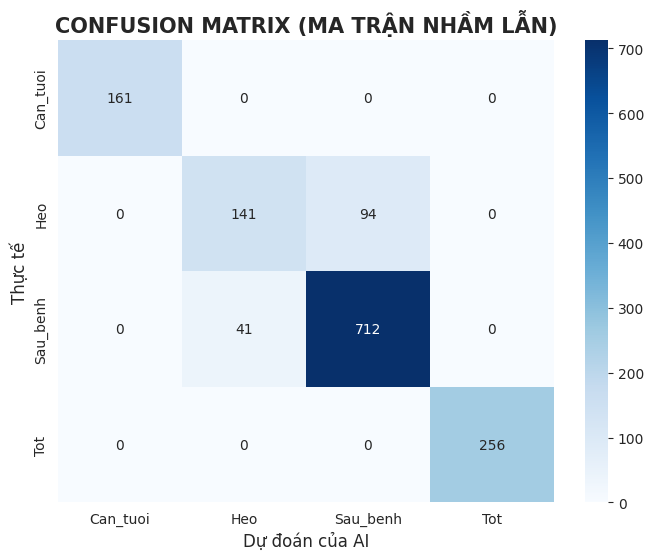

💡 HƯỚNG DẪN ĐỌC: Đường chéo chính (màu đậm nhất) là số lần dự đoán ĐÚNG.
   Các ô bên ngoài đường chéo là số lần dự đoán SAI.


In [ ]:
# [CELL 7] - Visualize Confusion Matrix
plt.figure(figsize=(8, 6))

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)

plt.title('CONFUSION MATRIX (MA TRẬN NHẦM LẪN)', fontsize=15, fontweight='bold')
plt.xlabel('Dự đoán của AI', fontsize=12)
plt.ylabel('Thực tế', fontsize=12)
plt.show()

print("💡 HƯỚNG DẪN ĐỌC: Đường chéo chính (màu đậm nhất) là số lần dự đoán ĐÚNG.")
print("   Các ô bên ngoài đường chéo là số lần dự đoán SAI.")

/tmp/ipython-input-481789730.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


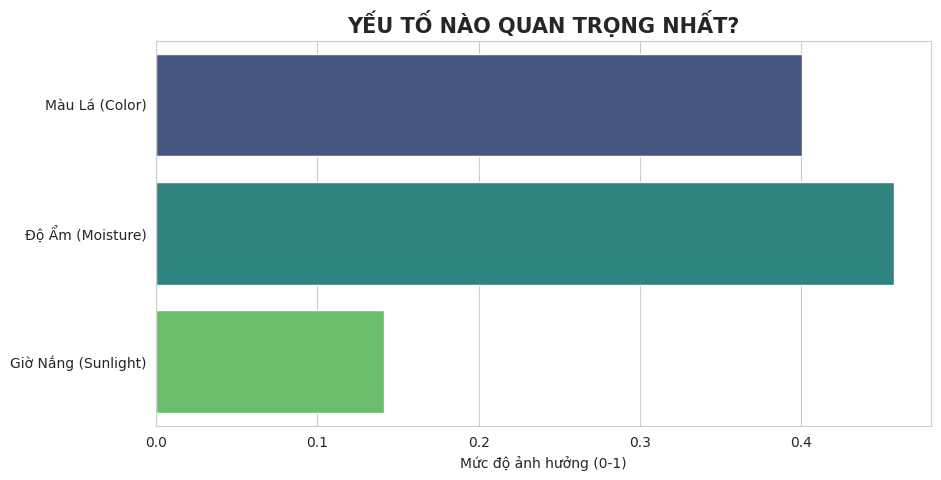

In [ ]:
# [CELL 8] - Feature Importance
plt.figure(figsize=(10, 5))

# Lấy độ quan trọng từ model
importances = rf_model.feature_importances_
feature_names = ['Màu Lá (Color)', 'Độ Ẩm (Moisture)', 'Giờ Nắng (Sunlight)']

# Vẽ biểu đồ cột
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('YẾU TỐ NÀO QUAN TRỌNG NHẤT?', fontsize=15, fontweight='bold')
plt.xlabel('Mức độ ảnh hưởng (0-1)')
plt.show()

In [ ]:
# [CELL 9] - Test Prediction (Thử nghiệm thực tế)

def predict_plant_status(color_text, moisture, sunlight):
    # 1. Map màu sắc sang số
    color_code = color_map.get(color_text)
    if color_code is None:
        return "Lỗi: Màu không hợp lệ!"

    # 2. Tạo dataframe input
    input_data = pd.DataFrame([[color_code, moisture, sunlight]],
                              columns=['Derived_Color_Encoded', 'Soil_Moisture', 'Sunlight_Hours'])

    # 3. Dự đoán
    pred = rf_model.predict(input_data)[0]
    return pred

# --- TEST CASE ---
print("🧪 THỬ NGHIỆM DỰ ĐOÁN:")
print("-" * 50)
# Case 1: Lá Xanh, Đất Khô (30%) -> Kỳ vọng: Can_tuoi
print(f"1. Lá Xanh, Đất 30%, Nắng 5h   -> AI đoán: {predict_plant_status('Xanh', 30, 5)}")

# Case 2: Lá Vàng, Đất Rất Khô (10%) -> Kỳ vọng: Heo
print(f"2. Lá Vàng, Đất 10%, Nắng 10h  -> AI đoán: {predict_plant_status('Vang', 10, 10)}")

# Case 3: Lá Nâu/Đốm, Đất Ẩm (70%)   -> Kỳ vọng: Sau_benh
print(f"3. Lá Nâu, Đất 70%, Nắng 4h    -> AI đoán: {predict_plant_status('Nau/Dom', 70, 4)}")

# Case 4: Lá Xanh, Đất Ướt (80%)     -> Kỳ vọng: Tot
print(f"4. Lá Xanh, Đất 80%, Nắng 6h   -> AI đoán: {predict_plant_status('Xanh', 80, 6)}")

🧪 THỬ NGHIỆM DỰ ĐOÁN:
--------------------------------------------------
1. Lá Xanh, Đất 30%, Nắng 5h   -> AI đoán: Can_tuoi
2. Lá Vàng, Đất 10%, Nắng 10h  -> AI đoán: Heo
3. Lá Nâu, Đất 70%, Nắng 4h    -> AI đoán: Sau_benh
4. Lá Xanh, Đất 80%, Nắng 6h   -> AI đoán: Tot


In [ ]:
# [CELL 11] - BLIND TEST (Kiểm tra với dữ liệu hoàn toàn mới)
print("🕵️‍♂️ Đang thực hiện BLIND TEST (Phép thử mù)...")
print("Dữ liệu này chưa từng xuất hiện trong quá trình Train hay Test.")
print("-" * 60)

# 1. Tạo danh sách các ca bệnh giả định (Test Cases)
# Lưu ý:
# - Màu: 0=Xanh, 1=Vàng, 2=Nâu/Đốm
# - Logic chúng ta đã dạy:
#    + Đất < 20 -> Héo
#    + Đất 20-40 + Xanh -> Cần tưới
#    + Đất > 40 + Xanh -> Tốt
#    + Nâu/Đốm -> Sâu bệnh

test_cases = [
    # Tên Case                  | Màu (Code) | Đất (%) | Nắng (Giờ) | Kỳ vọng (Label)
    ("Ca 1: Cây Khỏe Mạnh",        0,          75,       8,           "Tot"),       # Xanh, Đất ẩm
    ("Ca 2: Cây Khát Nước",        0,          30,       6,           "Can_tuoi"),  # Xanh, Đất hơi khô
    ("Ca 3: Cây Héo Rũ",           1,          10,       12,          "Heo"),       # Vàng, Đất khô khốc, Nắng gắt
    ("Ca 4: Sâu Bệnh Điển Hình",   2,          65,       4,           "Sau_benh"),  # Nâu, Đất ẩm (Bệnh ko lo đất)
    ("Ca 5: Case Khó (Lá Vàng)",  1,          15,       10,          "Heo"),       # Vàng + Đất khô -> Héo
    ("Ca 6: Case Khó (Mới Chớm)",  0,          21,       5,           "Can_tuoi"),  # Xanh + Đất 21 (Sát ngưỡng)
]

# 2. Chạy dự đoán
print(f"{'TÊN CASE':<25} | {'INPUT (Màu, Đất, Nắng)':<25} | {'DỰ ĐOÁN CỦA AI':<15} | {'KẾT QUẢ':<10}")
print("-" * 80)

for name, color_code, moisture, sunlight, expected in test_cases:
    # Tạo input chuẩn format dataframe
    input_data = pd.DataFrame([[color_code, moisture, sunlight]],
                              columns=['Derived_Color_Encoded', 'Soil_Moisture', 'Sunlight_Hours'])

    # Model dự đoán
    pred_label = rf_model.predict(input_data)[0]

    # So sánh
    status = "✅ OK" if pred_label == expected else "❌ SAI"

    # In ra màn hình
    input_str = f"({color_code}, {moisture}%, {sunlight}h)"
    print(f"{name:<25} | {input_str:<25} | {pred_label:<15} | {status}")

print("-" * 80)
print("👉 KẾT LUẬN CỦA MASTER:")
print("Nếu tất cả là ✅ OK -> Model đã học ĐÚNG LOGIC (Không phải học vẹt).")
print("Nếu có ❌ SAI -> Model đang bị Overfitting hoặc Logic chưa chặt chẽ.")

🕵️‍♂️ Đang thực hiện BLIND TEST (Phép thử mù)...
Dữ liệu này chưa từng xuất hiện trong quá trình Train hay Test.
------------------------------------------------------------
TÊN CASE                  | INPUT (Màu, Đất, Nắng)    | DỰ ĐOÁN CỦA AI  | KẾT QUẢ   
--------------------------------------------------------------------------------
Ca 1: Cây Khỏe Mạnh       | (0, 75%, 8h)              | Tot             | ✅ OK
Ca 2: Cây Khát Nước       | (0, 30%, 6h)              | Can_tuoi        | ✅ OK
Ca 3: Cây Héo Rũ          | (1, 10%, 12h)             | Heo             | ✅ OK
Ca 4: Sâu Bệnh Điển Hình  | (2, 65%, 4h)              | Sau_benh        | ✅ OK
Ca 5: Case Khó (Lá Vàng)  | (1, 15%, 10h)             | Heo             | ✅ OK
Ca 6: Case Khó (Mới Chớm) | (0, 21%, 5h)              | Can_tuoi        | ✅ OK
--------------------------------------------------------------------------------
👉 KẾT LUẬN CỦA MASTER:
Nếu tất cả là ✅ OK -> Model đã học ĐÚNG LOGIC (Không phải học vẹt).
Nếu có ❌ SAI -

💀 BẮT ĐẦU STRESS TEST (Mô phỏng cảm biến lỗi/nhiễu thực tế)...
------------------------------------------------------------
📉 Độ chính xác gốc (Dữ liệu sạch):  90.39%
📈 Độ chính xác chịu đựng (Khi nhiễu): 71.81%
------------------------------------------------------------
🗺️ ĐANG VẼ BẢN ĐỒ TƯ DUY CỦA AI (DECISION BOUNDARY)...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


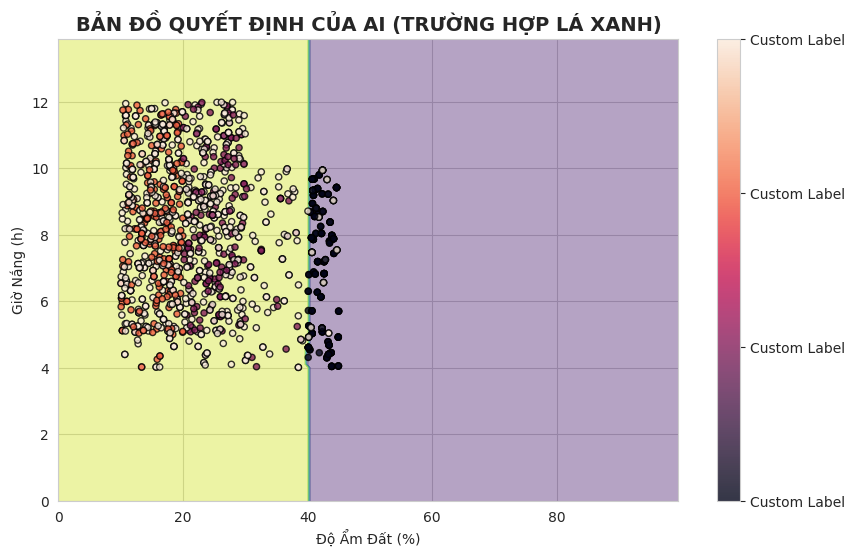

💡 GIẢI THÍCH:
1. Nếu Độ chính xác chịu đựng vẫn cao (>90%): Model thực sự HIỂU QUY LUẬT.
2. Biểu đồ trên cho thấy 'Ranh giới' mà AI vạch ra. Nếu ranh giới rõ ràng, vuông vức -> AI học đúng Logic.


In [ ]:
# [CELL 12] - STRESS TEST: KIỂM TRA ĐỘ BỀN VỚI NHIỄU (NOISE ROBUSTNESS)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

print("💀 BẮT ĐẦU STRESS TEST (Mô phỏng cảm biến lỗi/nhiễu thực tế)...")
print("-" * 60)

# 1. Tạo dữ liệu bị nhiễu (Noisy Data) từ tập Test gốc
# Giả sử cảm biến độ ẩm sai số ±5%, cảm biến nắng sai số ±1.5 giờ
noise_moisture = np.random.normal(0, 5, size=len(X_test))   # Nhiễu Gauss (Mean=0, Std=5)
noise_sunlight = np.random.normal(0, 1.5, size=len(X_test)) # Nhiễu Gauss (Mean=0, Std=1.5)

X_test_noisy = X_test.copy()
X_test_noisy['Soil_Moisture'] = X_test['Soil_Moisture'] + noise_moisture
X_test_noisy['Sunlight_Hours'] = X_test['Sunlight_Hours'] + noise_sunlight

# 2. Dự đoán trên dữ liệu nhiễu này
y_pred_noisy = rf_model.predict(X_test_noisy)
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)

# 3. Đánh giá kết quả
print(f"📉 Độ chính xác gốc (Dữ liệu sạch):  {accuracy * 100:.2f}%")
print(f"📈 Độ chính xác chịu đựng (Khi nhiễu): {accuracy_noisy * 100:.2f}%")
print("-" * 60)

# 4. Trực quan hóa Vùng Quyết Định (Decision Boundary) - Để xem "Tư duy" của AI
# Vẽ bản đồ tư duy của AI cho trường hợp LÁ XANH (Color Code = 0)
print("🗺️ ĐANG VẼ BẢN ĐỒ TƯ DUY CỦA AI (DECISION BOUNDARY)...")

# Tạo lưới điểm (Meshgrid) để quét toàn bộ không gian
x_min, x_max = 0, 100 # Độ ẩm từ 0-100
y_min, y_max = 0, 14  # Nắng từ 0-14
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 0.1))

# Dự đoán cho toàn bộ lưới điểm này (Giả sử Lá Xanh - Code 0)
# Chúng ta muốn xem với Lá Xanh, AI phân chia vùng Đất/Nắng thế nào
Z = rf_model.predict(np.c_[np.zeros_like(xx.ravel()), xx.ravel(), yy.ravel()])
Z_encoded = pd.Series(Z).map({'Tot': 0, 'Can_tuoi': 1, 'Heo': 2, 'Sau_benh': 3}).values
Z_encoded = Z_encoded.reshape(xx.shape)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_encoded, alpha=0.4, cmap='viridis')
plt.scatter(X_test['Soil_Moisture'], X_test['Sunlight_Hours'], c=pd.Series(y_test).map({'Tot': 0, 'Can_tuoi': 1, 'Heo': 2, 'Sau_benh': 3}), edgecolor='k', s=20, alpha=0.8)
plt.title("BẢN ĐỒ QUYẾT ĐỊNH CỦA AI (TRƯỜNG HỢP LÁ XANH)", fontsize=14, fontweight='bold')
plt.xlabel("Độ Ẩm Đất (%)")
plt.ylabel("Giờ Nắng (h)")
plt.colorbar(ticks=[0, 1, 2, 3], format='Custom Label') # Chú thích: 0=Tot, 1=Can_tuoi...
plt.show()

print("💡 GIẢI THÍCH:")
print("1. Nếu Độ chính xác chịu đựng vẫn cao (>90%): Model thực sự HIỂU QUY LUẬT.")
print("2. Biểu đồ trên cho thấy 'Ranh giới' mà AI vạch ra. Nếu ranh giới rõ ràng, vuông vức -> AI học đúng Logic.")